In [303]:
def is_patristic_matrix(D, labels, tree, tol=1e-6):
    """
    Heuristically checks if D is a patristic distance matrix.
    Compares a few random pairs against tree distances.
    """
    from random import sample

    leaf_index = {name: i for i, name in enumerate(labels)}
    all_leaves = list(leaf_index.keys())
    samples = sample(list(combinations(all_leaves, 2)), k=min(20, len(all_leaves) * (len(all_leaves)-1)//2))

    for a, b in samples:
        i, j = leaf_index[a], leaf_index[b]
        true_d = tree.get_distance(a, b)
        if abs(D[i, j] - true_d) > tol:
            print(a, b, D[i, j], true_d)
            return False
    return True

def test_matrix_against_tree(D, labels, tree, tol=1e-6, n_checks=20):
    from random import sample
    from itertools import combinations

    label_index = {name: i for i, name in enumerate(labels)}
    pairs = sample(list(combinations(labels, 2)), min(n_checks, len(labels) * (len(labels) - 1) // 2))

    for a, b in pairs:
        i, j = label_index[a], label_index[b]
        d_matrix = D[i, j]
        d_tree = tree.get_distance(a, b)
        if abs(d_matrix - d_tree) > tol:
            print(f"❌ Mismatch: {a}-{b}: matrix = {d_matrix:.6f}, tree = {d_tree:.6f}")
            return False
    print("patristic matrix matches tree distances.")
    return True


In [304]:
is_patristic_matrix(matrix, leaves, tree)

True

In [305]:
test_matrix_against_tree(matrix, leaves, tree)

patristic matrix matches tree distances.


True

In [306]:
compute_min_interfold_distances(matrix, leaves, fold_dict)

array([[       inf, 1.58960089, 1.80441768, 1.92480641, 0.18164153],
       [1.58960089,        inf, 1.61543768, 2.05131808, 1.64501821],
       [1.80441768, 1.61543768,        inf, 2.26613487, 1.859835  ],
       [1.92480641, 2.05131808, 2.26613487,        inf, 1.93240159],
       [0.18164153, 1.64501821, 1.859835  , 1.93240159,        inf]])

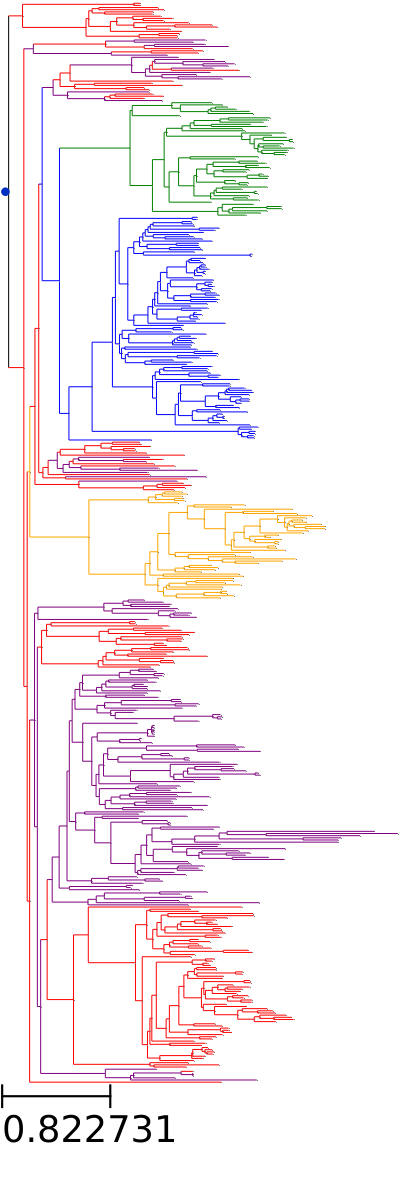

In [307]:
# Create and show tree style
ts = TreeStyle()
ts.show_leaf_name = False
gtdb_pruned.render('%%inline', tree_style=ts, w=400)

In [308]:
# tests
# Define a simple test tree
t = Tree("((A:1,B:1):2,C:3);", format=1)
for i, node in enumerate(t.traverse()):
    if not node.is_leaf():
        node.name = f'c{i}'
    
root = t.get_tree_root()

# Compute root distances
d_root = {node.name: node.get_distance(root) for node in t.traverse("preorder")}

# Test distances
assert abs(d_root["A"] - 3) < 1e-6
assert abs(d_root["B"] - 3) < 1e-6
assert abs(d_root["C"] - 3) < 1e-6

# Compute distances using LCA formula
def dist(a, b):
    lca = t.get_common_ancestor(a, b)
    print(lca, )
    return d_root[a] + d_root[b] - 2 * d_root[lca.name]

assert abs(dist("A", "B") - 2) < 1e-6
assert abs(dist("A", "C") - 6) < 1e-6
assert abs(dist("B", "C") - 6) < 1e-6

# Test LCA names (optional)
lca_ab = t.get_common_ancestor("A", "B")
lca_ac = t.get_common_ancestor("A", "C")
assert set(lca_ab.get_leaf_names()) == {"A", "B"}
assert set(lca_ac.get_leaf_names()) == {"A", "B", "C"}

print("All tests passed.")


   /-A
--|
   \-B

      /-A
   /-|
--|   \-B
  |
   \-C

      /-A
   /-|
--|   \-B
  |
   \-C
All tests passed.
